#### Importing Libraries

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

#### load data into pandas dataframe

In [2]:
well_df=pd.read_csv(r"C:\Users\User\Desktop\Machine Learning Project\ROP Prediction\welldata_NonOutlier.csv")
print("Shape :", well_df.shape)
well_df.head()

Shape : (7293, 9)


,Depth(m),weight on bit (kg),Rotary Speed (rpm),Pump Press (KPa),Temp In(degC),Flow In(liters/min),Flow Out %,WH Pressure (KPa),ROP(1 m)
0,25.96,0.0,151.09,3197.35,32.71,4200.22,101.61,-8485.61,17.31
1,26.27,0.0,151.09,3168.46,32.68,4195.60,101.70,-8485.61,18.63
2,26.59,0.0,61.54,3134.26,32.73,4174.82,96.81,-8485.61,5.66
3,26.90,0.0,60.23,3110.61,32.86,4167.89,96.67,-8485.61,11.67
4,27.24,0.0,61.75,3144.74,32.88,4173.26,96.63,-8485.61,120.20


#### Split data into features(X) and Target(y)

In [21]:
X=well_df.drop(["ROP(1 m)"], axis=1)
y=well_df.iloc[:, -1].values.reshape(-1,1)
X1=well_df.drop(["ROP(1 m)"], axis=1)
y1=well_df.iloc[:, -1].values.reshape(-1,1)

#### What are the correlation between the various features in the dataset ?

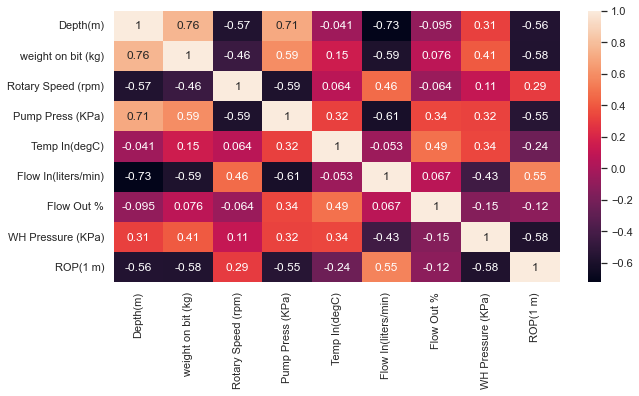

In [190]:
plt.figure(figsize=(10,5))
sns.heatmap(well_df.corr(), annot=True);

#### Further spliting of data into train and test data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.25, random_state=42)

In [23]:
print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (5469, 8)
Shape of X_test : (1824, 8)
Shape of y_train : (5469, 1)
Shape of y_test : (1824, 1)


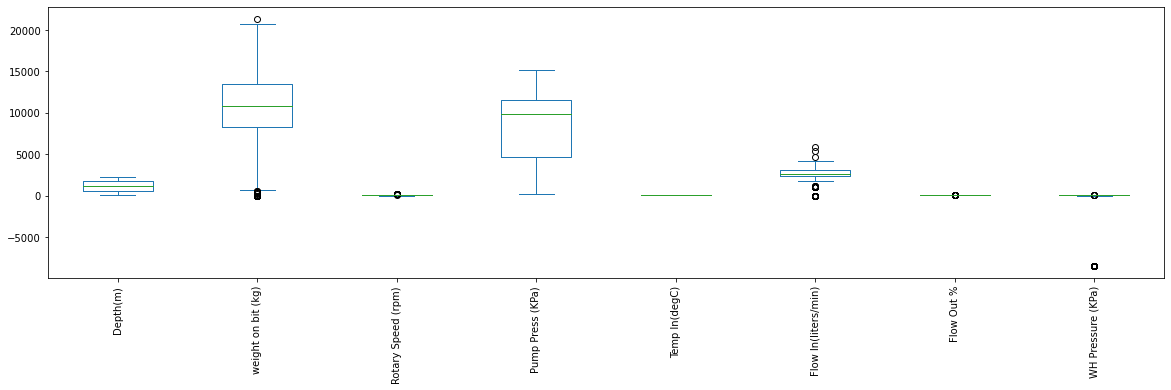

In [24]:
X_train.plot.box(figsize=(20,5), rot=90);

#### Since Support vector machine models are distance based, scaling the data into appropriate ranges is  imperative.

In [25]:
scaleX=StandardScaler().fit(X_train1)
scaleY=StandardScaler().fit(y_train1)

X_train_stand=scaleX.transform(X_train1)
X_test_stand=scaleX.transform(X_test1)
y_train_stand=scaleY.transform(y_train1)
y_test_stand=scaleY.transform(y_test1)

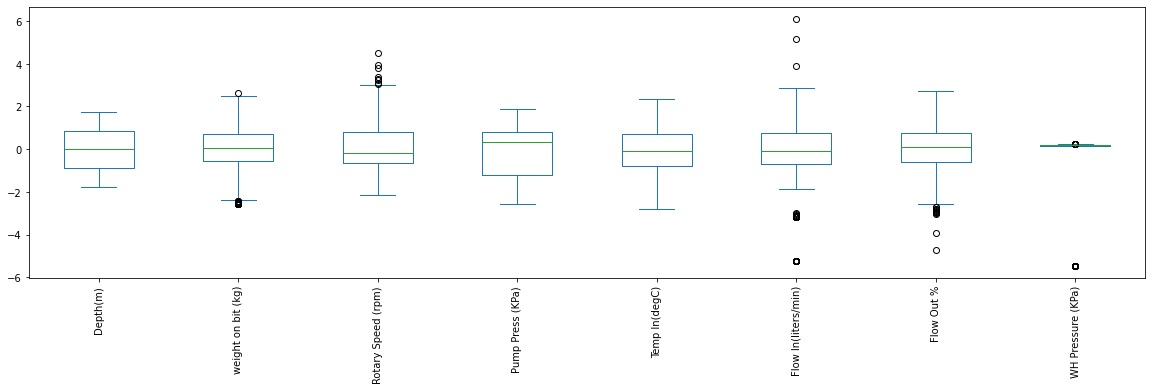

In [26]:
pd.DataFrame(X_train_stand, columns=X_train1.columns).plot.box(figsize=(20,5), rot=90);

In [27]:
def get_preds(y_test, y_preds):
    y_test=pd.DataFrame(y_test)
    y_test.rename(columns={0:'Actual'}, inplace=True)
    y_preds=pd.DataFrame(y_preds)
    y_preds.rename(columns={0:'Predicted'}, inplace=True)
    predictions=pd.concat([y_test, y_preds], axis=1)
    return predictions

## SUPPORT VECTOR MACHINES

In [29]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [30]:
svr=SVR(epsilon=0.01)
svrparams={'gamma':[0.01,0.1],'C':[100,1000],'kernel':['rbf', 'poly']}
grid_sear=GridSearchCV(estimator=svr,param_grid=svrparams,cv=5,verbose=3,scoring='r2')

In [32]:
grid_sear.fit(X_train_stand,y_train_stand.ravel())

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.766 total time=   3.2s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.784 total time=   3.1s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.712 total time=   3.2s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.635 total time=   3.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.802 total time=   3.1s
[CV 1/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.741 total time=   0.8s
[CV 2/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.742 total time=   0.8s
[CV 3/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.693 total time=   0.9s
[CV 4/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.612 total time=   0.8s
[CV 5/5] END ....C=100, gamma=0.01, kernel=poly;, score=0.788 total time=   0.9s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.809 total time=   9.3s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;,

GridSearchCV(cv=5, estimator=SVR(epsilon=0.01),
             param_grid={'C': [100, 1000], 'gamma': [0.01, 0.1],
                         'kernel': ['rbf', 'poly']},
             scoring='r2', verbose=3)

In [44]:
best_svr=grid_sear.best_estimator_

In [45]:
grid_sear.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [46]:
pred_test=best_svr.predict(X_test_stand)
pred_train=best_svr.predict(X_train_stand)

In [42]:
print('root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_train_stand,pred_train))))
print('Mean absolute error is {}'.format(mean_absolute_error(y_train_stand,pred_train)))
print('R2 score is {}'.format(r2_score(y_train_stand,pred_train)))

root mean squared error is 0.36402851946627035
Mean absolute error is 0.11618061165390721
R2 score is 0.8674832370151953


In [51]:
print('root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_test_stand,pred_test))))
print('Mean absolute error is {}'.format(mean_absolute_error(y_test_stand,pred_test)))
print('R2 score is {}'.format(r2_score(y_test_stand,pred_test)))
print('MAPE is {}'.format(mean_absolute_percentage_error(y_test_stand,pred_test)))

root mean squared error is 0.5527863499787102
Mean absolute error is 0.16885125244561466
R2 score is 0.7700587106433288
MAPE is 1.270870671534987


In [54]:
y_test_inverse = scaleY.inverse_transform(y_test_stand)
pred1 = scaleY.inverse_transform(pred_test.reshape(-1,1))
svr_predictions=get_preds(y_test_inverse, pred1)
svr_predictions.head(10)

,Actual,Predicted
0,3.23,2.921778
1,7.69,8.952479
2,10.62,11.050136
3,6.37,6.390517
4,4.79,5.428111
5,8.51,7.056492
6,37.25,36.451122
7,3.94,3.854221
8,5.92,5.055394
9,36.63,55.275078


#### Evaluation of SVM model

In [104]:
svr_predictions.corr()

,Actual,Predicted
Actual,1.000000,0.878081
Predicted,0.878081,1.000000


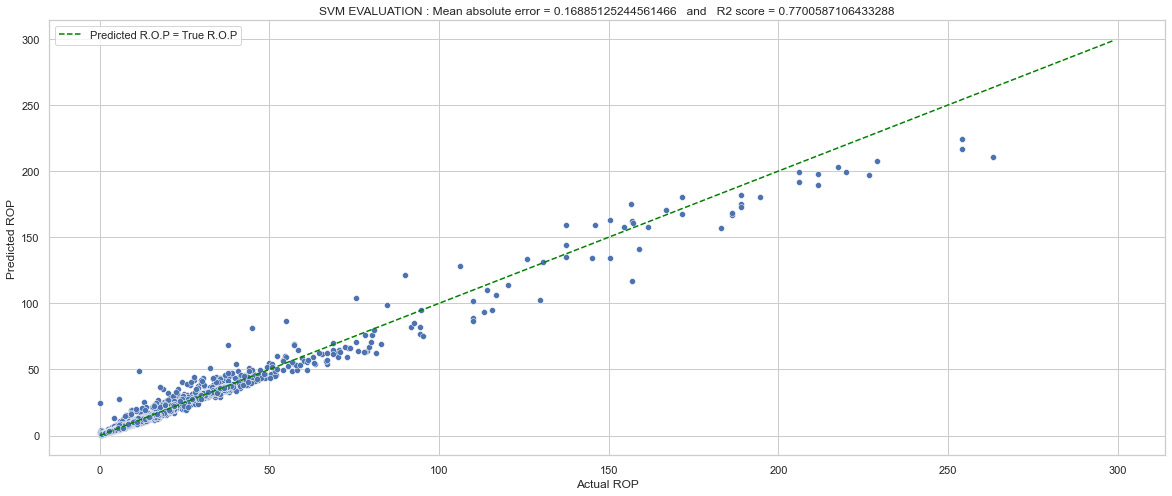

In [220]:
plt.figure(figsize=(20,8))
plt.title('SVM EVALUATION : Mean absolute error = {}   and   R2 score = {}'.format(mean_absolute_error(y_test_stand,pred_test),r2_score(y_test_stand,pred_test)))
plt.plot(np.arange(0,300,1),np.arange(0,300,1),color='green', linestyle='dashed',label='Predicted R.O.P = True R.O.P')
sns.scatterplot(x=rf_predictions["Actual"],y=rf_predictions["Predicted"])
plt.xlabel('Actual ROP')
plt.ylabel('Predicted ROP');

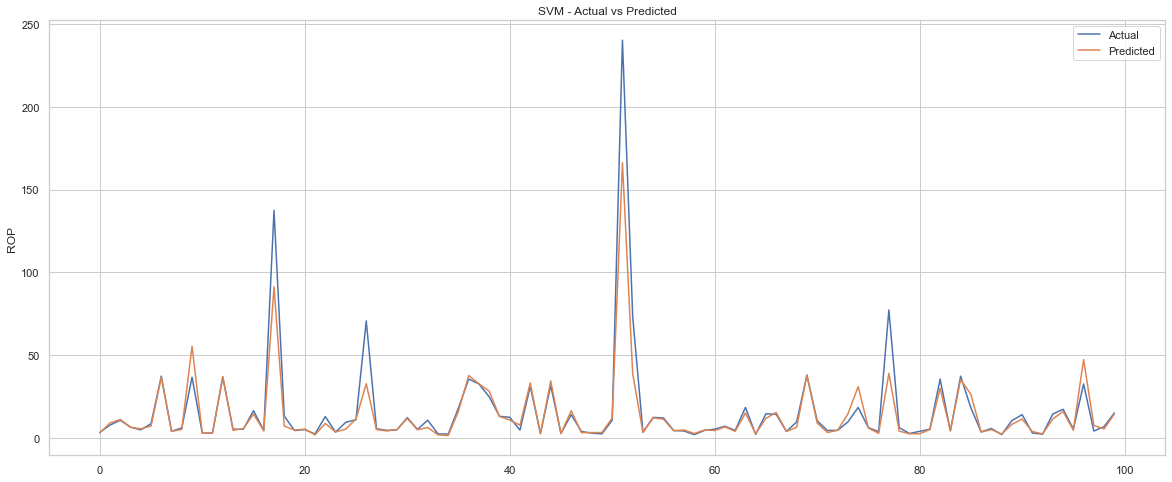

In [217]:
plt.figure(figsize=(20,8))
plt.plot(svr_predictions['Actual'][:100])
plt.plot(svr_predictions['Predicted'][:100])
plt.ylabel('ROP')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('SVM - Actual vs Predicted')
plt.show()

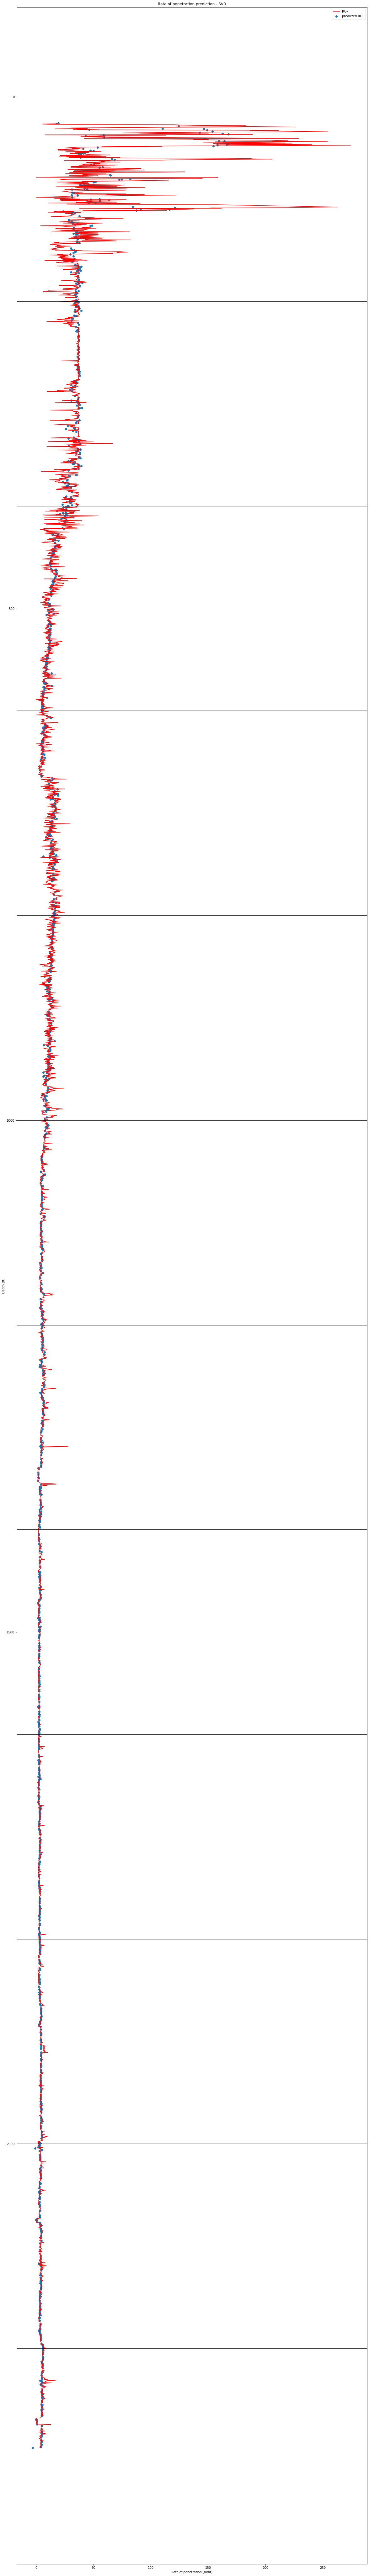

In [80]:
fig,ax=plt.subplots(figsize=(20,150))
ax.plot(y,X['Depth(m)'].values.reshape(-1,1),'r',label='ROP')
ax.scatter(pred1,X_test['Depth(m)'].values.reshape(-1,1),label='predicted ROP')
ay=plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Depth (ft)')
plt.xlabel('Rate of penetration (m/hr)')
plt.title('Rate of penetration prediction - SVR');
plt.legend(loc="best")
depth=[depth for depth in range(200,2400,200) ]
for i in range(len(depth)):
    plt.axhline(depth[i],color='black' )

## RANDOM FOREST

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
RF=RandomForestRegressor()

In [58]:
params={'n_estimators':[300,400,500,1000],
        "max_features":[2,3,4],'max_depth':[5,10,None]}

In [59]:
gridrf=GridSearchCV(estimator=RF,param_grid=params,cv=5,
                    verbose=3,scoring='r2')

In [61]:
gridrf.fit(X_train1,y_train1.ravel())

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=5, max_features=2, n_estimators=300;, score=0.837 total time=   0.8s
[CV 2/5] END max_depth=5, max_features=2, n_estimators=300;, score=0.871 total time=   0.8s
[CV 3/5] END max_depth=5, max_features=2, n_estimators=300;, score=0.778 total time=   0.8s
[CV 4/5] END max_depth=5, max_features=2, n_estimators=300;, score=0.674 total time=   0.8s
[CV 5/5] END max_depth=5, max_features=2, n_estimators=300;, score=0.851 total time=   0.8s
[CV 1/5] END max_depth=5, max_features=2, n_estimators=400;, score=0.840 total time=   1.2s
[CV 2/5] END max_depth=5, max_features=2, n_estimators=400;, score=0.869 total time=   1.2s
[CV 3/5] END max_depth=5, max_features=2, n_estimators=400;, score=0.783 total time=   1.2s
[CV 4/5] END max_depth=5, max_features=2, n_estimators=400;, score=0.688 total time=   1.2s
[CV 5/5] END max_depth=5, max_features=2, n_estimators=400;, score=0.857 total time=   1.2s
[CV 1/5] END max_d

[CV 4/5] END max_depth=10, max_features=3, n_estimators=400;, score=0.727 total time=   2.6s
[CV 5/5] END max_depth=10, max_features=3, n_estimators=400;, score=0.861 total time=   2.7s
[CV 1/5] END max_depth=10, max_features=3, n_estimators=500;, score=0.850 total time=   3.4s
[CV 2/5] END max_depth=10, max_features=3, n_estimators=500;, score=0.895 total time=   3.2s
[CV 3/5] END max_depth=10, max_features=3, n_estimators=500;, score=0.819 total time=   3.2s
[CV 4/5] END max_depth=10, max_features=3, n_estimators=500;, score=0.730 total time=   3.3s
[CV 5/5] END max_depth=10, max_features=3, n_estimators=500;, score=0.860 total time=   3.2s
[CV 1/5] END max_depth=10, max_features=3, n_estimators=1000;, score=0.850 total time=   6.6s
[CV 2/5] END max_depth=10, max_features=3, n_estimators=1000;, score=0.894 total time=   6.7s
[CV 3/5] END max_depth=10, max_features=3, n_estimators=1000;, score=0.817 total time=   6.6s
[CV 4/5] END max_depth=10, max_features=3, n_estimators=1000;, scor

[CV 1/5] END max_depth=None, max_features=4, n_estimators=1000;, score=0.848 total time=  13.7s
[CV 2/5] END max_depth=None, max_features=4, n_estimators=1000;, score=0.894 total time=  13.7s
[CV 3/5] END max_depth=None, max_features=4, n_estimators=1000;, score=0.817 total time=  13.9s
[CV 4/5] END max_depth=None, max_features=4, n_estimators=1000;, score=0.724 total time=  13.6s
[CV 5/5] END max_depth=None, max_features=4, n_estimators=1000;, score=0.860 total time=  13.8s


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, None], 'max_features': [2, 3, 4],
                         'n_estimators': [300, 400, 500, 1000]},
             scoring='r2', verbose=3)

In [62]:
gridrf.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=500)

In [63]:
best_rf=gridrf.best_estimator_

In [66]:
predrf_train=best_rf.predict(X_train1)
predrf_test=best_rf.predict(X_test1)

In [67]:
print('root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_train1,predrf_train))))
print('Mean absolute error is {}'.format(mean_absolute_error(y_train1,predrf_train)))
print('R2 score is {}'.format(r2_score(y_train1,predrf_train)))

root mean squared error is 2.737042560160254
Mean absolute error is 0.9002644212836006
R2 score is 0.9801094427424318


In [70]:
rf_predictions=get_preds(y_train1, predrf_train)
rf_predictions.head(10)

,Actual,Predicted
0,2.78,2.98748
1,4.76,4.45020
2,14.07,14.25998
3,3.16,3.71922
4,3.17,2.97322
5,10.23,9.93334
6,6.70,6.63588
7,4.56,5.85820
8,27.24,26.90862
9,24.64,29.52488


#### Evaluation of Random Forest Model

In [93]:
rf_predictions.corr()

,Actual,Predicted
Actual,1.000000,0.990622
Predicted,0.990622,1.000000


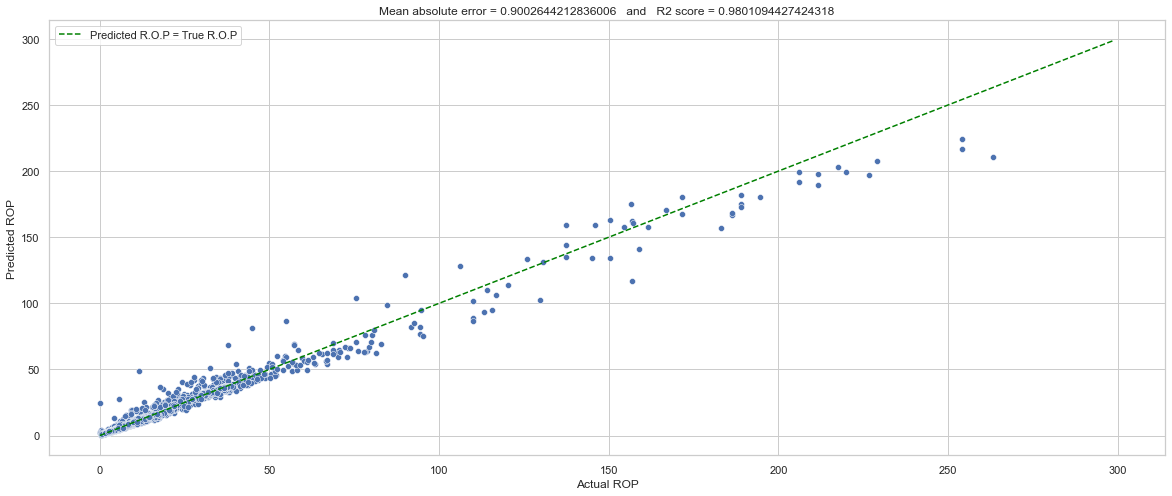

In [221]:
plt.figure(figsize=(20,8))
plt.title('Mean absolute error = {}   and   R2 score = {}'.format(mean_absolute_error(y_train1,predrf_train),r2_score(y_train1,predrf_train)))
plt.plot(np.arange(0,300,1),np.arange(0,300,1),color='green', linestyle='dashed',label='Predicted R.O.P = True R.O.P')
sns.scatterplot(x=rf_predictions["Actual"],y=rf_predictions["Predicted"])
plt.xlabel('Actual ROP')
plt.ylabel('Predicted ROP');

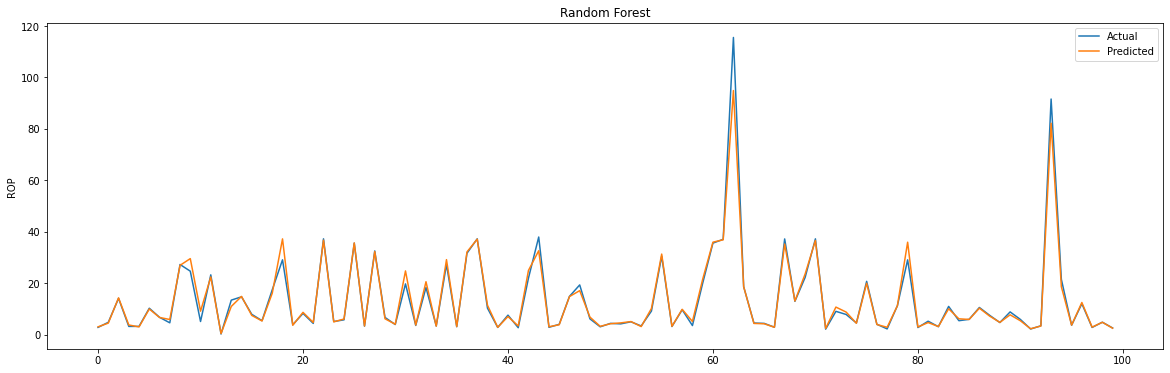

In [71]:
plt.figure(figsize=(20,6))
plt.plot(rf_predictions['Actual'][:100])
plt.plot(rf_predictions['Predicted'][:100])
plt.ylabel('ROP')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('Random Forest')
plt.show()

In [212]:
print('root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_test,predrf_test))))
print('Mean absolute error is {}'.format(mean_absolute_error(y_test,predrf_test)))
print('R2 score is {}'.format(r2_score(y_test,predrf_test)))

root mean squared error is 9.533746382151124
Mean absolute error is 2.8431139692982463
R2 score is 0.8184010304026917


In [73]:
rf_prediction=get_preds(y_test1, predrf_test)
rf_prediction.head(10)

,Actual,Predicted
0,3.23,3.02316
1,7.69,8.62392
2,10.62,10.89906
3,6.37,7.85222
4,4.79,5.52994
5,8.51,8.52750
6,37.25,35.83532
7,3.94,3.80544
8,5.92,5.40146
9,36.63,52.83666


In [92]:
rf_prediction.corr()

,Actual,Predicted
Actual,1.000000,0.904676
Predicted,0.904676,1.000000


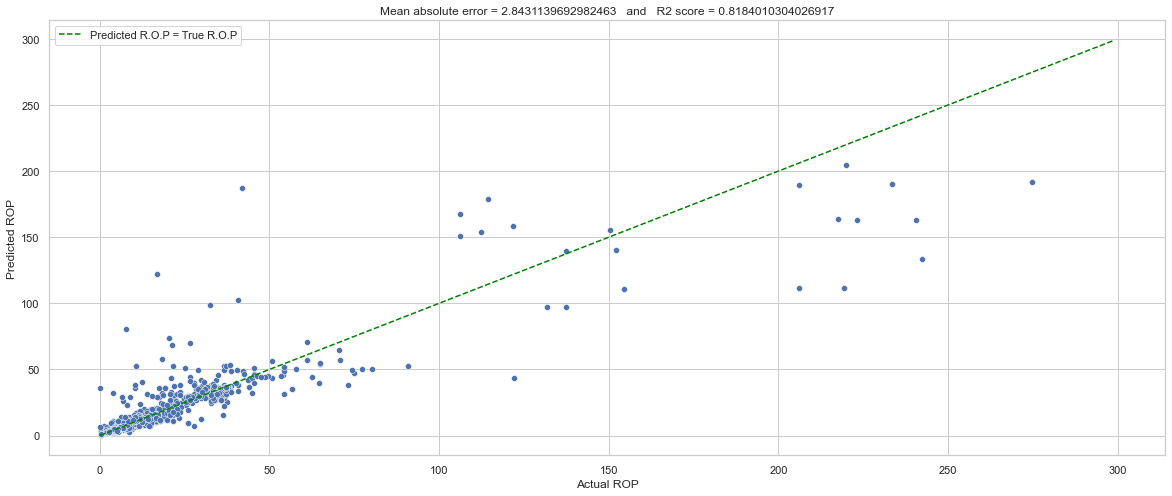

In [222]:
plt.figure(figsize=(20,8))
plt.title('Mean absolute error = {}   and   R2 score = {}'.format(mean_absolute_error(y_test1,predrf_test),r2_score(y_test1,predrf_test)))
plt.plot(np.arange(0,300,1),np.arange(0,300,1),color='green', linestyle='dashed',label='Predicted R.O.P = True R.O.P')
sns.scatterplot(x=rf_prediction["Actual"],y=rf_prediction["Predicted"])
plt.xlabel('Actual ROP')
plt.ylabel('Predicted ROP');

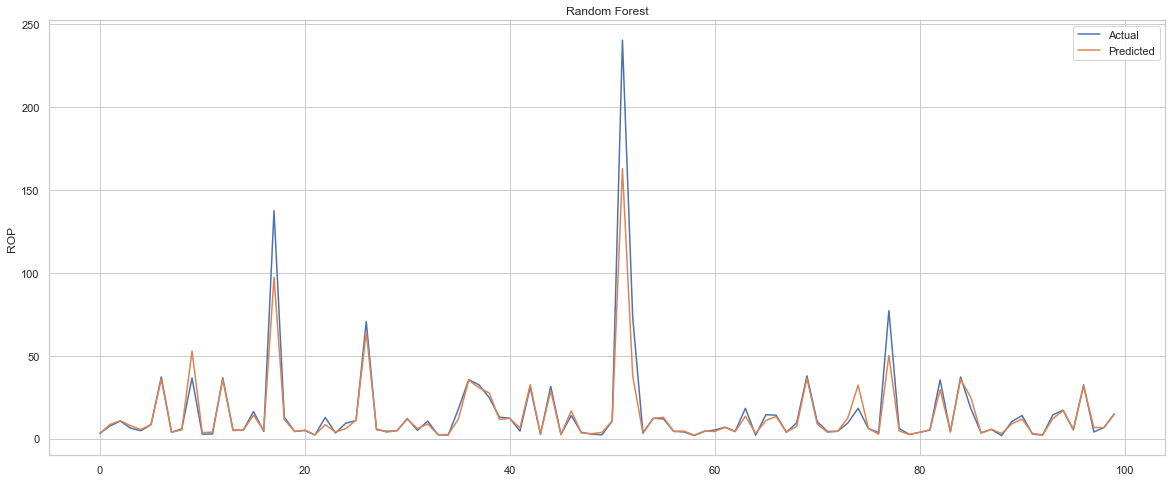

In [223]:
plt.figure(figsize=(20,8))
plt.plot(rf_prediction['Actual'][:100])
plt.plot(rf_prediction['Predicted'][:100])
plt.ylabel('ROP')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('Random Forest')
plt.show()

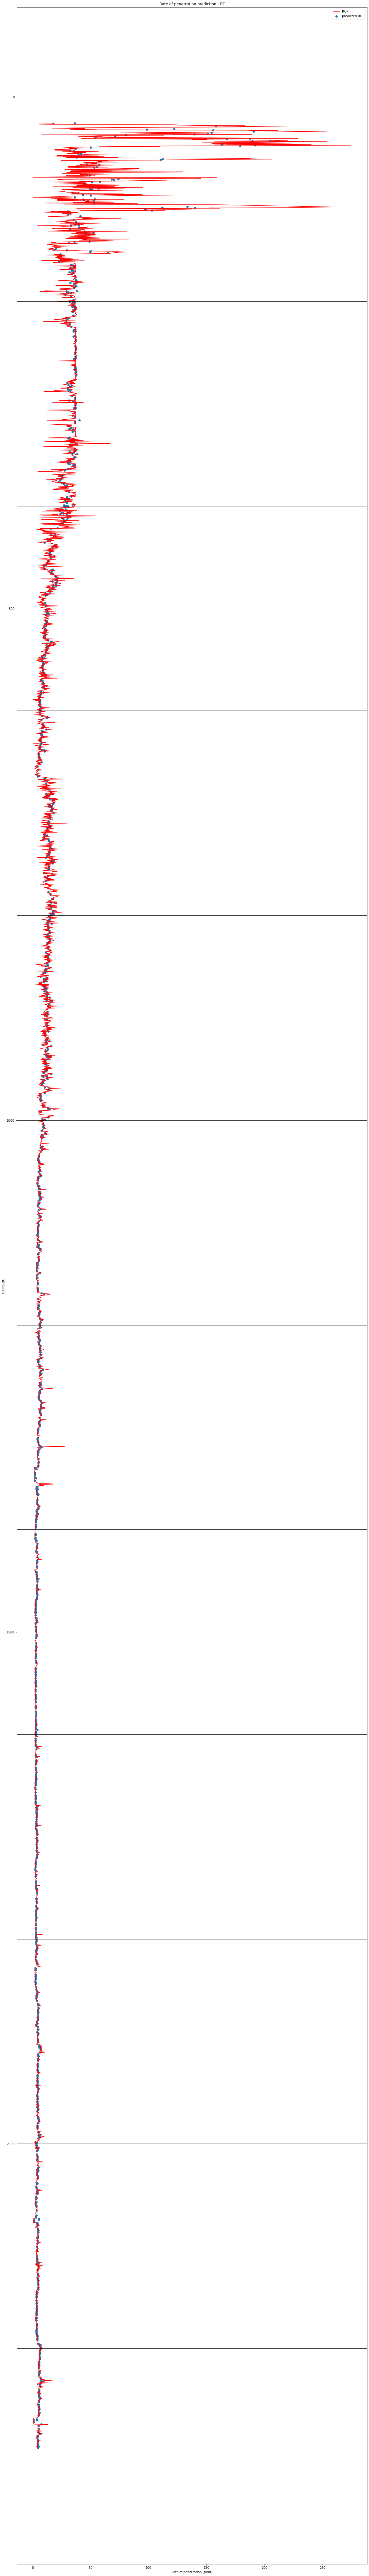

In [181]:
fig,ax=plt.subplots(figsize=(20,150))
ax.plot(y,X['Depth(m)'].values.reshape(-1,1),'r',label='ROP')
ax.scatter(predrf_test,X_test1['Depth(m)'].values.reshape(-1,1),label='predicted ROP')
ay=plt.gca()
ay.set_ylim(ay.get_ylim()[::-1])
plt.ylabel('Depth (ft)')
plt.xlabel('Rate of penetration (m/hr)')
plt.title('Rate of penetration prediction - RF');
plt.legend(loc="best")
depth=[depth for depth in range(200,2400,200) ]
for i in range(len(depth)):
    plt.axhline(depth[i],color='black' )

#### What are the most importance features of the dataset with respect to the performance of the model ?

In [76]:
importance=pd.Series(data=best_rf.feature_importances_,index=X.columns)

In [77]:
sorted_importance=importance.sort_values(ascending=True)

Text(0, 0.5, 'Feature name')

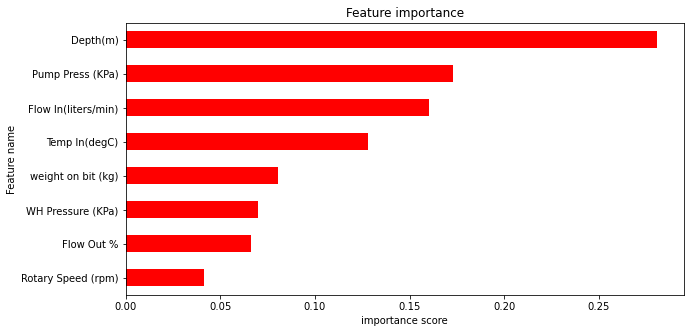

In [78]:
plt.figure(figsize=(10,5))
sorted_importance.plot(kind='barh',color='red')
plt.title('Feature importance') 
plt.xlabel('importance score') 
plt.ylabel('Feature name')

- The above bar chart shows that the Depth of a given well, the pump pressure and the rate of flow are the three most important features.

## EXTREME GRADIENT BOOSTING

In [113]:
from xgboost import XGBRegressor

In [134]:
#XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train1, y_train1):
    param_tuning = {
        'learning_rate': [0.01,0.05,0.1,0.15,0.2],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 10, 100],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : range(100,1100,100),
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           #scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train1,y_train1)
    
    return gsearch.best_params_


In [135]:
hyperParameterTuning(X_train1, y_train1)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.7}

In [173]:
import warnings
warnings.filterwarnings(action="ignore")
xgb_model = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.5,
        learning_rate = 0.02,
        max_depth = 10,
        min_child_weight = 1,
        n_estimators = 1000,
        subsample = 0.7)

%time xgb_model.fit(X_train1, y_train1, early_stopping_rounds=5, eval_set=[(X_train1, y_train1)], verbose=False)

y_pred_xgb = xgb_model.predict(X_test1)

mse_xgb = mean_absolute_error(y_test1, y_pred_xgb)

print("MAE: ", mse_xgb)

Wall time: 6.69 s
MAE:  2.7787534264427727


In [226]:
y_pred_xgb_train = xgb_model.predict(X_train1)
y_pred_xgb = xgb_model.predict(X_test1)

#### Evaluation of XGBOOST model

In [175]:
xgb_prediction=get_preds(y_test1, y_pred_xgb)
xgb_prediction.head(10)

,Actual,Predicted
0,3.23,3.207412
1,7.69,8.925272
2,10.62,11.352888
3,6.37,6.913970
4,4.79,5.706894
5,8.51,8.895493
6,37.25,35.148491
7,3.94,3.744508
8,5.92,5.346307
9,36.63,50.345505


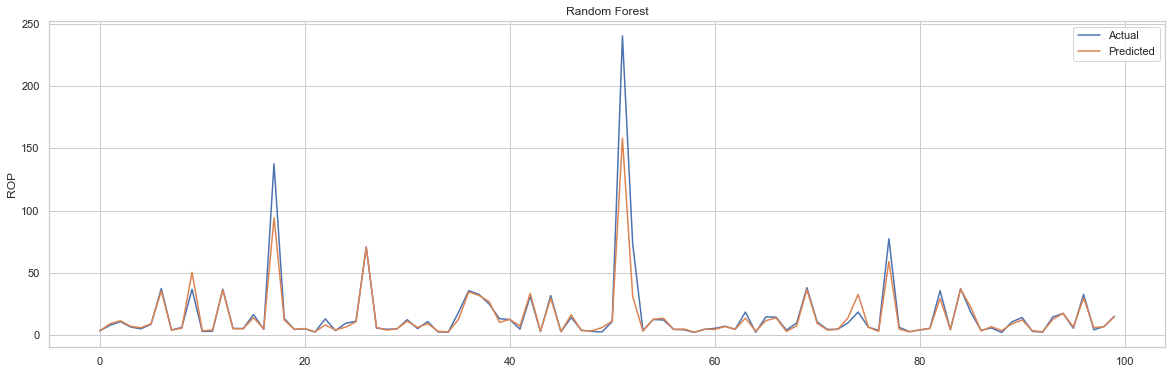

In [207]:
plt.figure(figsize=(20,6))
plt.plot(xgb_prediction['Actual'][:100])
plt.plot(xgb_prediction['Predicted'][:100])
plt.ylabel('ROP')
plt.legend(['Actual', 'Predicted'], loc='best')
plt.title('Random Forest')
plt.show()

In [176]:
xgb_prediction.corr()

,Actual,Predicted
Actual,1.000000,0.914217
Predicted,0.914217,1.000000


In [208]:
print('root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_test1,y_pred_xgb))))
print('Mean absolute error is {}'.format(mean_absolute_error(y_test1,y_pred_xgb)))
print('R2 score is {}'.format(r2_score(y_test1,y_pred_xgb)))

root mean squared error is 9.075684794744562
Mean absolute error is 2.7787534264427727
R2 score is 0.8354321486046943


In [215]:
print('TRAIN root mean squared error is {}'.format(np.sqrt(mean_squared_error(y_train1,y_pred_xgb_train))))
print('TRAIN Mean absolute error is {}'.format(mean_absolute_error(y_train1,y_pred_xgb_train)))
print('TRAIN R2 score is {}'.format(r2_score(y_train1,y_pred_xgb_train)))

TRAIN root mean squared error is 0.6093498756786873
TRAIN Mean absolute error is 0.4242225834258101
TRAIN R2 score is 0.9990141353304355


In [224]:
xgb_prediction.corr()

,Actual,Predicted
Actual,1.000000,0.914217
Predicted,0.914217,1.000000


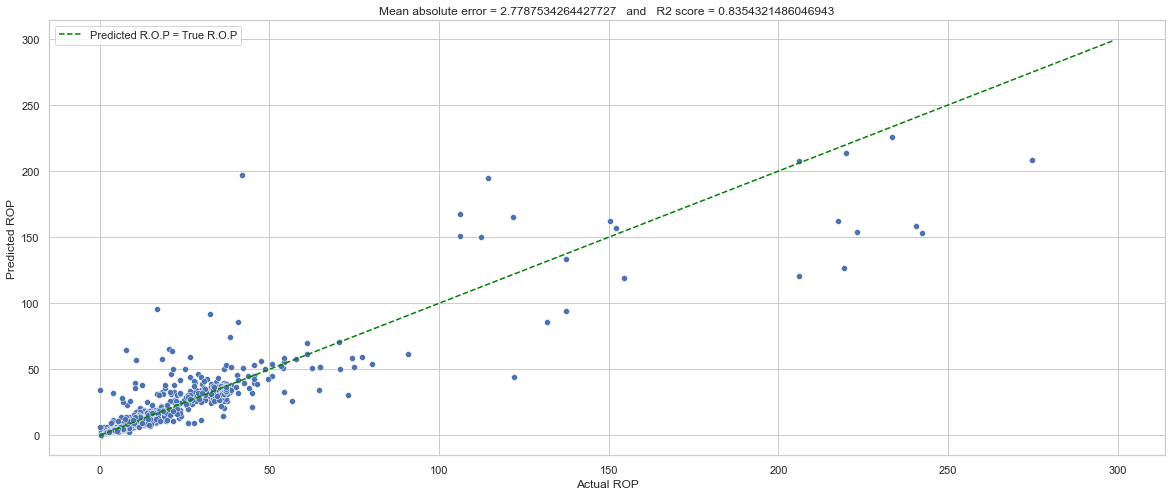

In [227]:
plt.figure(figsize=(20,8))
plt.title('Mean absolute error = {}   and   R2 score = {}'.format(mean_absolute_error(y_test1,y_pred_xgb),r2_score(y_test1,y_pred_xgb)))
plt.plot(np.arange(0,300,1),np.arange(0,300,1),color='green', linestyle='dashed',label='Predicted R.O.P = True R.O.P')
sns.scatterplot(x=xgb_prediction["Actual"],y=xgb_prediction["Predicted"])
plt.xlabel('Actual ROP')
plt.ylabel('Predicted ROP');

## Evaluation Summary

### Train Set

| Model              | R2 Score|   RMSE   |   MAE   |
| ------------------ | ------- | -------- | ------- |
| Support Vector     | 0.87    | 0.35     | 0.11    |
| Random Forest      | 0.98    | 2.73     | 0.90    |
| XGBoost            | 0.99    | 0.61     | 0.42    |


### Test set

| Model              | R2 Score|   RMSE   |   MAE   |
| ------------------ | ------- | -------- | ------- |
| Support Vector     | 0.77    | 0.55     | 0.17    |
| Random Forest      | 0.82    | 9.53     | 2.84    |
| XGBoost            | 0.84    | 9.07     | 2.78    |